In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Display summary statistics of the dataset
titanic_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Check for missing values
missing_values = titanic_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Fill missing values for 'Age' with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
# Fill missing values for 'Embarked' with the mode (most common value)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
# Drop the 'Cabin' column due to too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

In [14]:
# Drop rows where 'Fare' is missing (if any)
titanic_data.dropna(subset=['Fare'], inplace=True)

In [16]:
# Confirm no missing values remain
print("Missing values after cleaning:\n", titanic_data.isnull().sum())

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Univariate Analysis and Bivariate Analysis

In [20]:
sns.set(style="whitegrid")

# Interpreting Patterns and Trends

# 1. Survival Rate Analysis

From the univariate analysis of the Survived column:

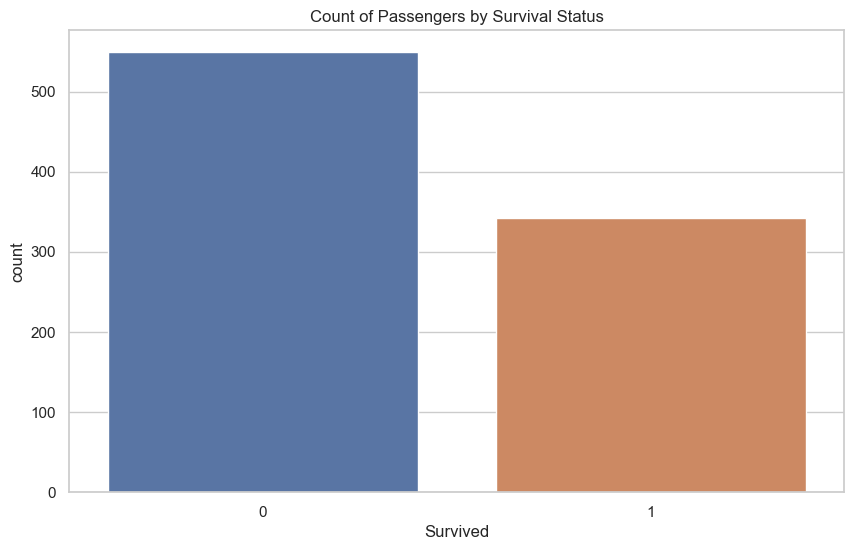

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Count of Passengers by Survival Status')
plt.show()


Insight: The plot shows that fewer passengers survived than those who did not. This indicates a lower overall survival rate.

# 2. Class and Survival
From the bivariate analysis of Pclass and Survived:

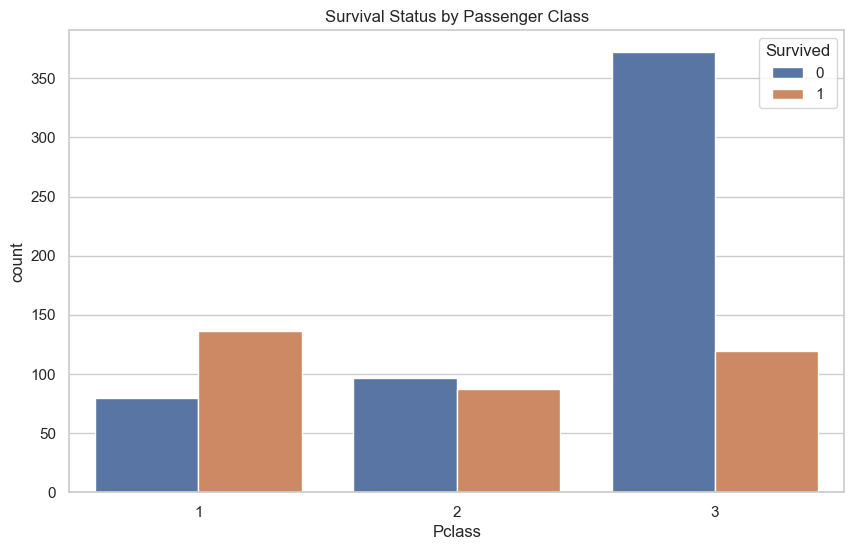

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Status by Passenger Class')
plt.show()


Insight: Passengers in 1st class had a higher survival rate compared to those in 2nd and 3rd class. This suggests that social-economic status (represented by passenger class) was a significant factor in survival.

# 3. Gender and Survival
From the bivariate analysis of Sex and Survived:

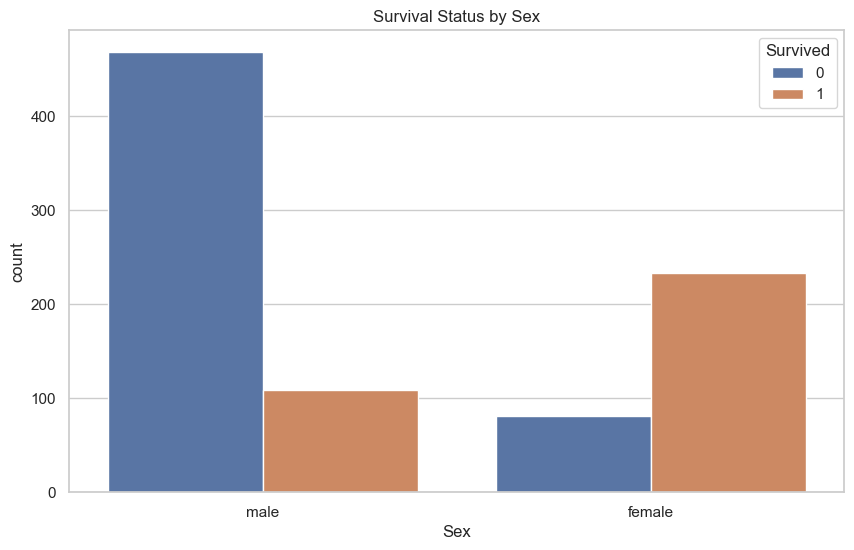

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival Status by Sex')
plt.show()

Insight: Females had a higher survival rate than males. This suggests that gender played a crucial role in survival, potentially due to the "women and children first" policy during the evacuation.

# 4. Age and Survival
From the bivariate analysis of Age and Survived:

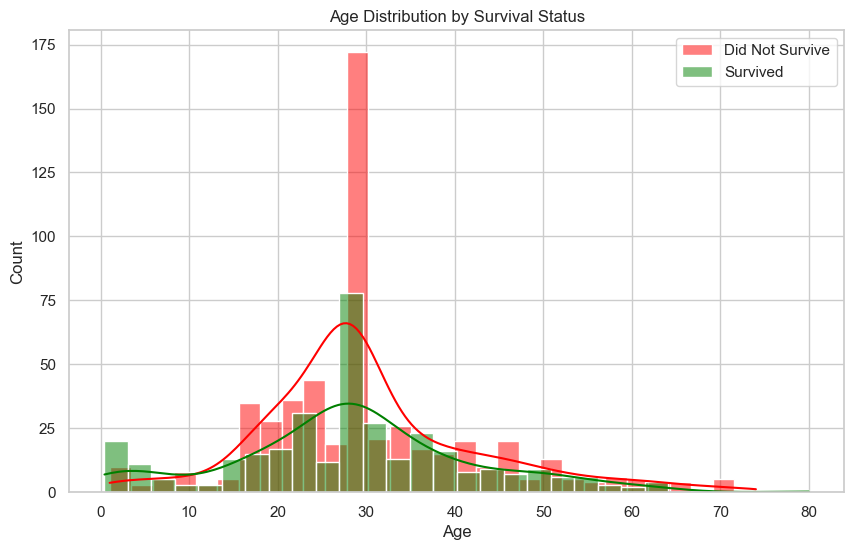

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'], kde=True, bins=30, color='red', label='Did Not Survive')
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'], kde=True, bins=30, color='green', label='Survived')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.show()

Insight: Younger passengers (especially children) had higher survival rates compared to older passengers. This aligns with the policy of prioritizing children during rescue operations.

# 5. Fare and Survival
From the bivariate analysis of Fare and Survived:

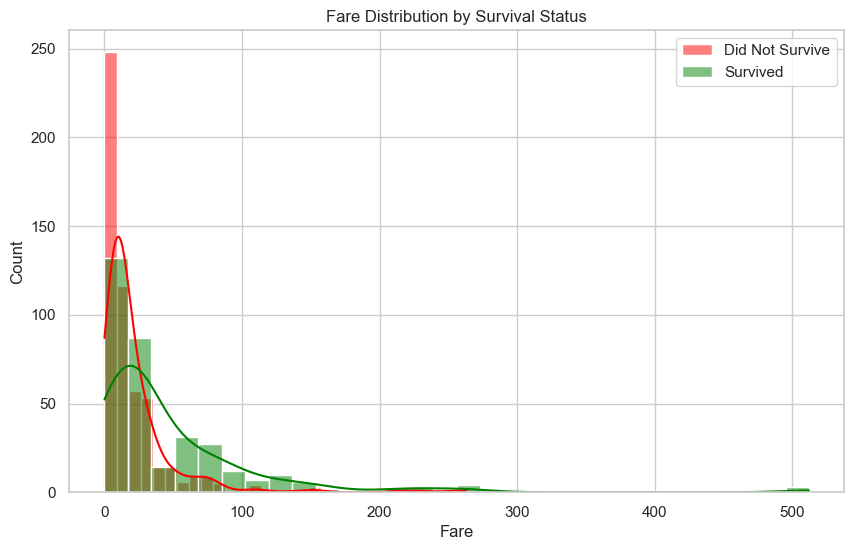

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Fare'], kde=True, bins=30, color='red', label='Did Not Survive')
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Fare'], kde=True, bins=30, color='green', label='Survived')
plt.title('Fare Distribution by Survival Status')
plt.legend()
plt.show()

Insight: Passengers who paid higher fares (often 1st class) had a higher chance of survival. This again points to socio-economic status as a crucial factor.

# 6. Embarkation Point and Survival
From the bivariate analysis of Embarked and Survived:

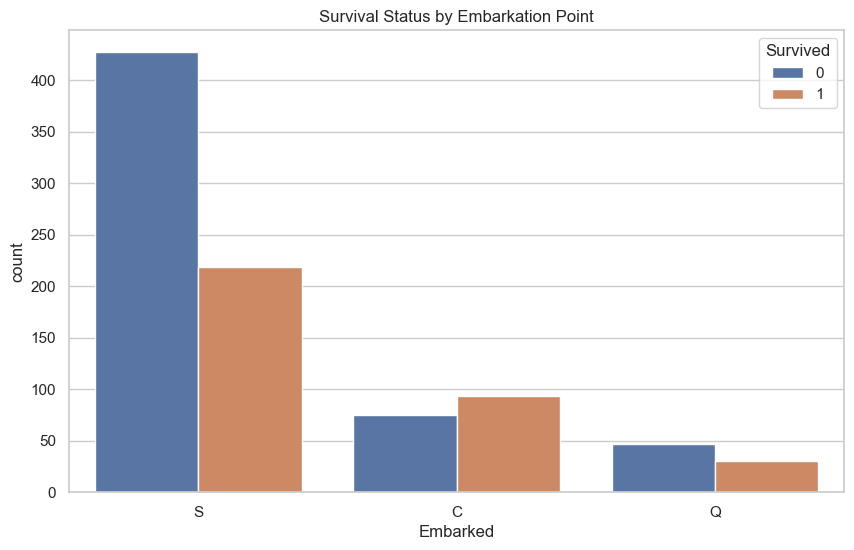

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_data)
plt.title('Survival Status by Embarkation Point')
plt.show()

Insight: Passengers who embarked from Cherbourg had a higher survival rate compared to those who embarked from Southampton or Queenstown. This could be due to a higher proportion of 1st class passengers boarding at Cherbourg.

# Multivariate Analysis

# 1. Pair Plot

A pair plot can help visualize relationships between multiple features.

C:\Users\aaa\AppData\Local\Temp\ipykernel_8344\3183395370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_pairplot['Sex'] = titanic_pairplot['Sex'].map({'male': 0, 'female': 1})


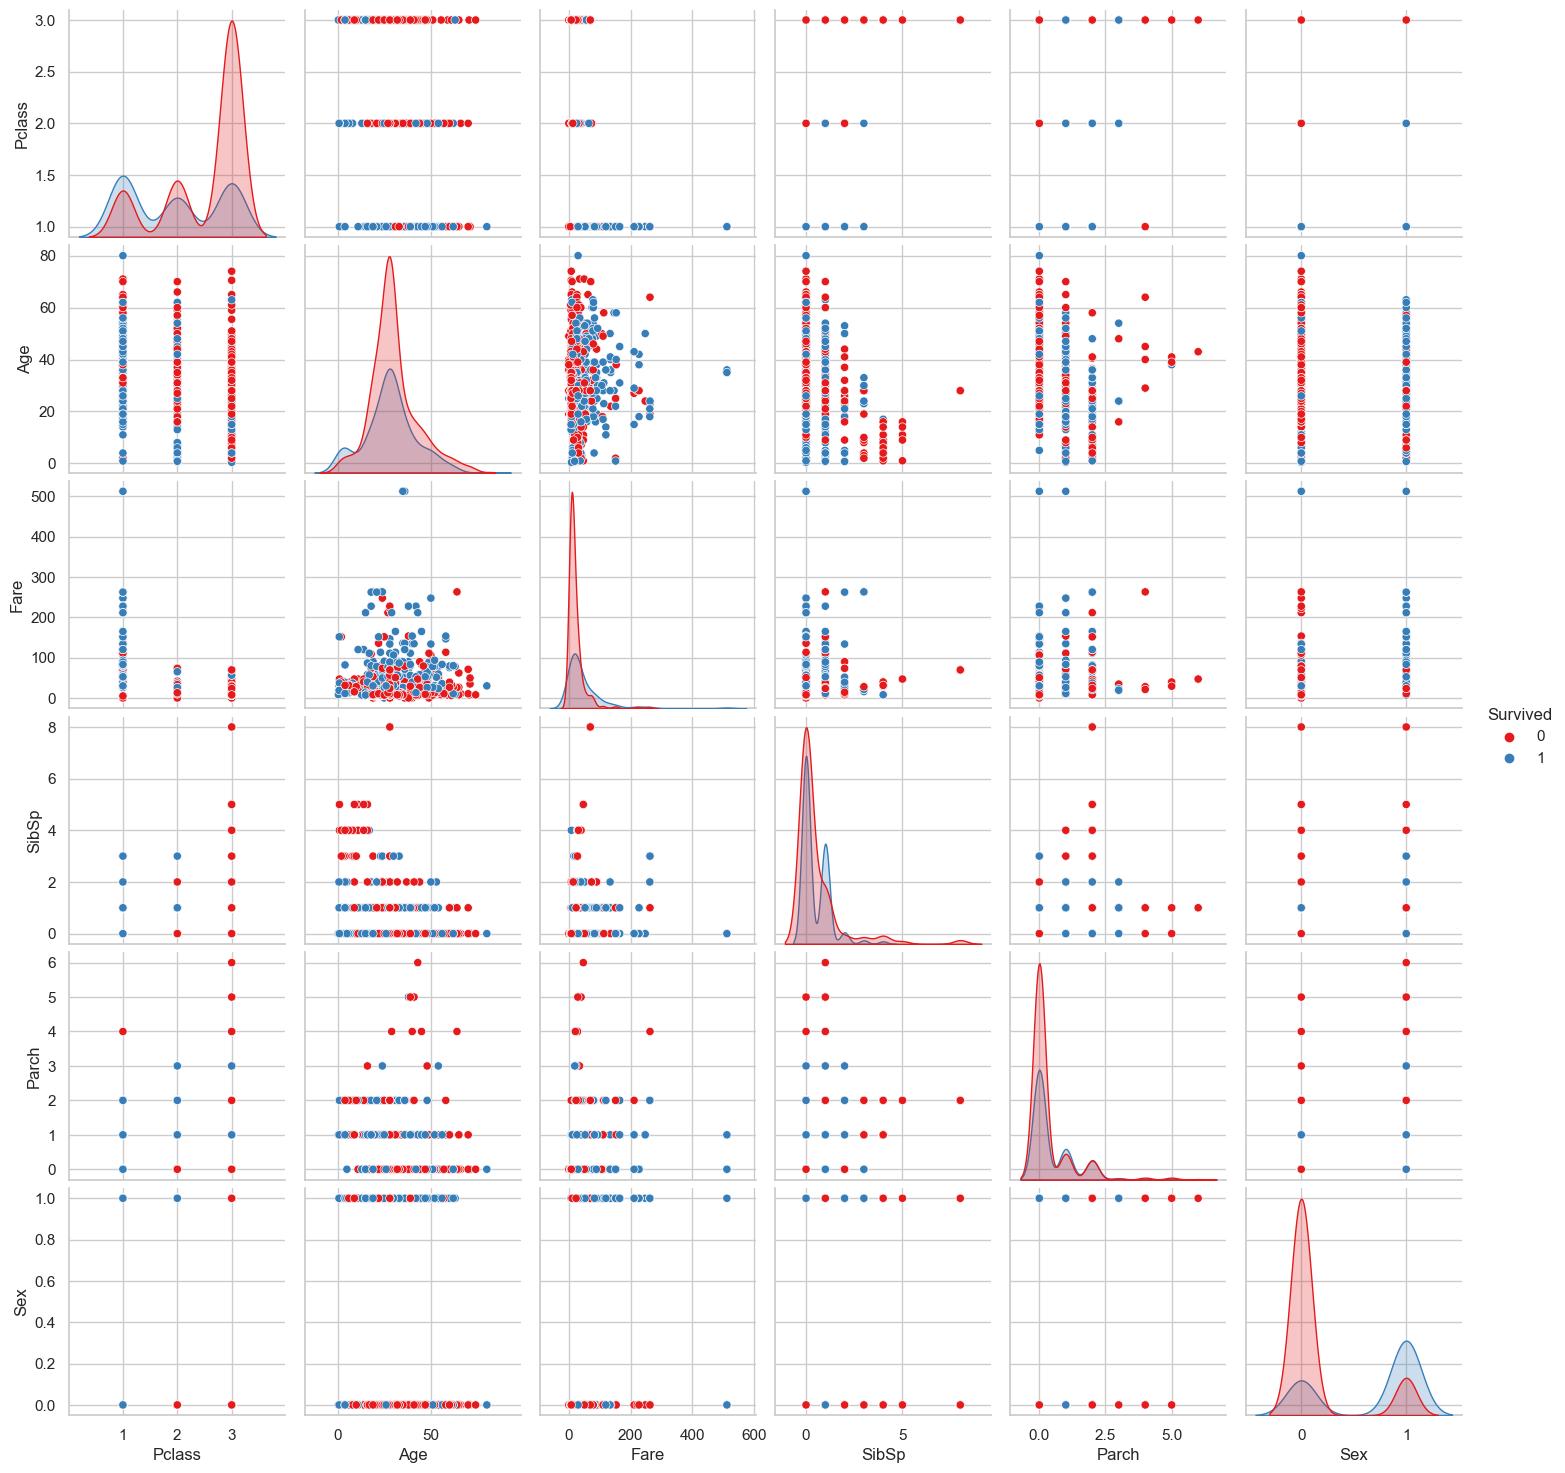

In [27]:
import seaborn as sns

# Select a subset of features for the pair plot
pair_plot_features = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex']
titanic_pairplot = titanic_data[pair_plot_features]

# Convert 'Sex' to numeric for pair plot
titanic_pairplot['Sex'] = titanic_pairplot['Sex'].map({'male': 0, 'female': 1})

# Pair plot
sns.pairplot(titanic_pairplot, hue='Survived', palette='Set1', diag_kind='kde')
plt.show()


Insights:
    
Age vs. Fare:

If you see that younger passengers (lower ages) have a different distribution of fares, it might indicate that younger passengers were more likely to be in different classes.

Pclass vs. Age:

If you see distinct clusters of points colored by Survived, it suggests that class and age both played a role in survival.
For example, if you see that many 1st class passengers who survived were older, it could be an indicator that age and class were important survival factors.

SibSp vs. Parch:

You might see patterns in family groups, indicating that passengers with different family configurations had different survival rates.

Sex vs. Other Variables:

The separation of male and female passengers in relation to survival rates can be quite stark, revealing that gender was a significant factor.

# 2. Correlation Matrix

A correlation matrix shows how strongly different features are correlated with each other.

C:\Users\aaa\AppData\Local\Temp\ipykernel_8344\1084124868.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic_corr.corr()


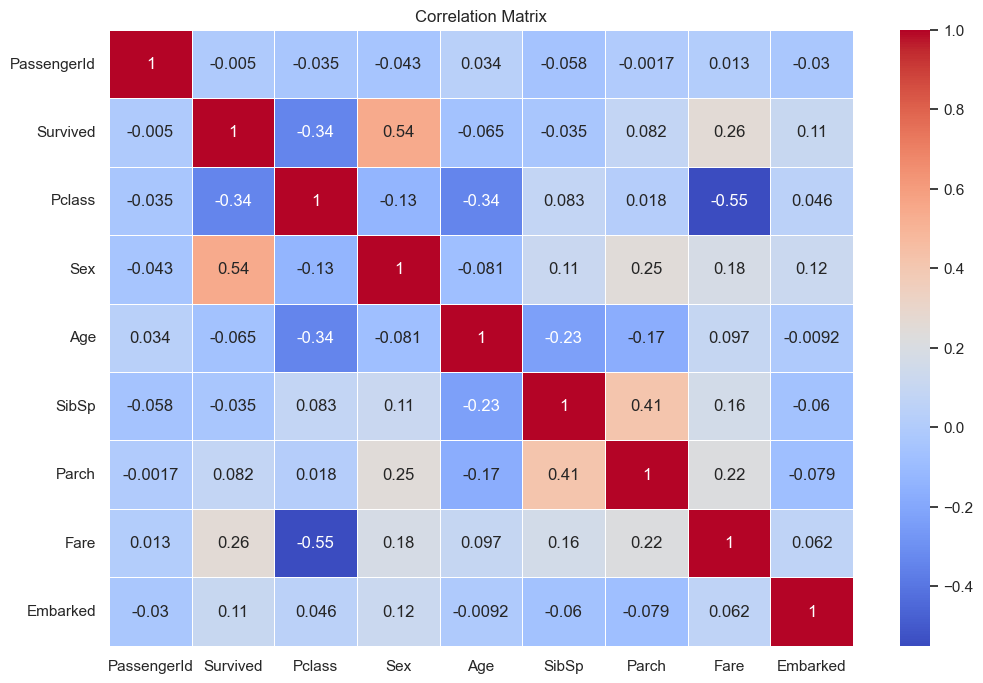

In [28]:
# Convert categorical variables to numeric for correlation matrix
titanic_corr = titanic_data.copy()
titanic_corr['Sex'] = titanic_corr['Sex'].map({'male': 0, 'female': 1})
titanic_corr['Embarked'] = titanic_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Correlation matrix
corr_matrix = titanic_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Insights: Shows the correlation between features. For example, Pclass and Fare might show a negative correlation, indicating higher class passengers paid more.